# SLU7 - Regression with Linear Regression: Learning notebook

In this notebook we will cover the following topics:

    - What is regression
    - Simple Linear Regression and Multiple Linear Regression
    - Mean Squared Error and Error Measure
    - Closed Form Solution - Ordinary Least Squares
    - How to apply Linear Regression using Scikit-learn
    - Gradient Descent

Hopefully you still remember vectors, matrices, and NumPy from prep course units 12 and 13 😉.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Dropdown
import ipywidgets as widgets
from sklearn.datasets import load_diabetes

plt.rcParams["figure.figsize"]=(4.8, 3.6)

## What is regression? 

Regression is a modeling task intended to create a (linear or non-linear) map between the **independent variables** (i.e. the columns in your pandas dataframe) and a set of **continuous dependent variables** (i.e. the variables you want to predict) by using a set of **parameters** (which will be estimated).

**Examples of regression tasks:**

* Predicting house prices (example range: \[ 100k €; 500k € \]);
* Predicting the rating that a user would assign to a movie (example range: [1 star; 7 stars]); 
* Predicting the total sales for each day in each shop of a shopping mall;
* Predicting emotional descriptors for a song;
* Predicting the trajectory of a fighter jet.


Let's consider the first 3 terms we mentioned through an example.

When predicting house prices:
* The **independent variables** are the features related to a house, such as the number of rooms, the total area available, the crime rate of the neighborhood, and the number of miles to the closest big city; 
* The **dependent variable** is the price of the house;
* The **parameters** are a set of internal variables that will define how we map the independent and dependent variables together.

In order to predict house prices, the regression model will take the independent variables and its internal parameters, perform a sequence of operations with them, and output the predicted prices of the houses.

Nowadays, [we have *many* different algorithms we can use to solve this task](https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154), but we'll focus on one of the easiest to understand: **linear regression**. It's one of the most popular regression methods in the world to this day, because it makes it easy (1) to interpret and implement a model and (3) extend the model to deal with datasets with only a few data points and minimal noise and outliers. Remember that noise refers to irrelevant data that obscures patterns in which we're interested and makes our models less accurate. 

Let's explore how **simple linear regression** works.

![easy](media/lets_do_it.gif)

## 1 - Simple Linear Regression

The simple linear regression model we're going to use here has only one feature. Consider this equation: 

$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

* $\hat{y}$ are the values predicted by the model; 
* $x$ are the values of the input feature for each data point; 
* $\beta_0$, usually called the *intercept*, is the y-axis value where $x=0$; 
* $\beta_1$, usually called the *coefficient*, tells you how much $\hat{y}$ changes when $x$ changes.

Note that both $\hat{y}$ and $x$ are vectors.

The relationship between $x$ and $\hat{y}$ can be stated as follows: _For each unit you increment in $x$, you increment $\beta_1$ units in $\hat{y}$._

Let's see an example so we can better understand what all these symbols are about!

### 1.1 - House pricing example:

For example: 

$$HousePrice = 1.1 + 4 \cdot NumberOfRooms$$

This equation means that the **price of the house increments by 4 units (e.g. 1 unit = 10000€) each time I add a room to the house**, and that **a house with 0 rooms would have a base price of 1.1 units**.

### 1.2 - Implementing and visualizing a simple linear model

In order to implement the simple linear regression model, we can create a lambda function:

In [2]:
linear_regression = lambda x, b0, b1: b0 + b1 * x

and then use it by passing some data and parameters into it:

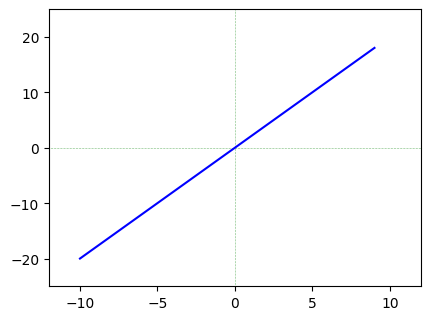

In [3]:
def plot_regression_simple(x, y, xlim, ylim):
    origin = (0, 0)

    # Set the x-axis and y-axis limits
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Plot axis for better visualization
    plt.plot(origin, ylim, 'g:', xlim, origin, 'g:', linewidth=0.4)

    # Plot linear model
    plt.plot(x, y, 'b')
    plt.show()

# Base independent data
x_lin = np.arange(-10, 10)

# Parameters
intercept = 0
coefficient = 2

# Dependent variable
y_lin = linear_regression(x_lin, intercept, coefficient)
plot_regression_simple(x_lin, y_lin, (-12, 12), (-25, 25))

Now, imagine that we want to try out data with noise. Let's load it and visualize its shape:

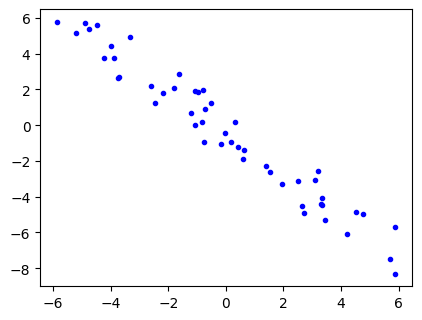

In [4]:
df = pd.read_csv('data/linear-learning-notebook.csv')
df = df.sort_values('x')
x_lin_df = df['x'].values
y_lin_df = df['y'].values

plt.plot(x_lin_df, y_lin_df, 'b.');

Clearly, the data looks linear. You can easily see that just by looking at it, right?

Use the interactive demo to try it out below:

In [5]:
def plot_simple_regression(b0=0, b1=1, xlim=(-5, 5), ylim=(-5, 5)):
    y_pred = linear_regression(x_lin_df, b0, b1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(x_lin_df, y_lin_df, 'b.')
    plt.plot(x_lin_df, y_pred, 'r-')
    plt.plot([0, 0], ylim, 'g-', xlim, [0, 0], 'g-', linewidth=0.4)

def simple_linear_regression_manual_demo_1(): 
    interact(plot_simple_regression, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=0), 
         b1=FloatSlider(min=-3, max=3, step=0.01, value=1), 
         xlim=fixed((-10, 10)), 
         ylim=fixed((-10, 10)));

simple_linear_regression_manual_demo_1()

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

The green lines represent the x- and y-axis, and the red is the $\hat{y}$ for each value of $x$. As you can see, if you decrease/increase $\beta_0$, the value where the red line crosses the y-axis decreases/increases. If you increase/decrease $\beta_1$, the slope of the line increases/decreases.

If you were at all familiar with simple linear models before, this should look too easy to you.

![easy](media/easy_peasy.gif)

However, even though you've come up with a workable solution, you might notice that there's no way to know precisely how good your results are. You might have a few ideas to tweak this model, but how can you know how much of a difference your changes will actually make? Effectively, you're no better off than when you were just using your mouse in the interactive demo to line up a red line between blue dots. 

You must be wondering if there's a better way to evaluate your model.

### 1.3 - Error measure for Linear Regression

Here is where error measures come in. By finding a way of measuring the error in our models, we can more easily find models that are less error prone. So, let's dive into it.

The main goal is to build a model that generates estimates as close to the data points as possible. If, for each sample $x_i$, our model outputs a value $\hat{y_i}$ and we know its true value is $y_i$, then we can calculate how much the model is wrong with the following equation:

$$ e_i = y_i - \hat{y_i} $$

But this would only consider one sample and, as we know, the observations might contain noise. Therefore, we need to consider all of our observations together, as well as their level of error in aggregate. There are actually several ways of doing this, but the error we will present here is the **mean squared error**, which is a standard error metric used for linear regressions. It's defined as:

$$MSE(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

$\hat{y}$ is the output of our linear model:

$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

Basically, for each sample, we calculate the difference between the predicted value and the true value. We square the result (because the difference can be positive or negative) and then sum the squares across all of the samples.

This is what we usually call a **cost function** or **error function**, which represents the error between the true values of our samples and the predictions of our model. The better our model is, the lower this metric should be. We normally use the notation $J$ to refer to the cost function:

$$J(y, \hat{y}) = MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 $$


We can also implement this cost function with a lambda function:

In [6]:
linear_regression_mse = lambda y, y_hat: ((y - y_hat)**2).mean()

In the results of the code block below, see how the metric increases when our model estimate and sample values are farther apart, and how the metric decreases when they are closer together. In particular, if the prediction matches the true sample value, then the metric is equal to zero.

In [7]:
sample_values = np.array([0.2, 0.45])
close_estimates = np.array([0.25, 0.5])
far_estimates = np.array([10., 10.])

print('Small error measure for close sample and estimate: {}'.format(linear_regression_mse(sample_values, close_estimates)))
print('Big error measure for distant sample and estimate: {}'.format(linear_regression_mse(sample_values, far_estimates)))
print('Null error measure for equal sample and estimate: {}'.format(linear_regression_mse(sample_values, sample_values)))

Small error measure for close sample and estimate: 0.0024999999999999988
Big error measure for distant sample and estimate: 93.62125000000002
Null error measure for equal sample and estimate: 0.0


At this point, it should make sense to you that decreasing this metric will lead to a better model. 

Try to use this metric in the following demo to find a linear model that fits our data the best. Notice how the value increases as you slide towards a worse model and decreases as you slide towards a better model.

In [8]:
def plot_regression(b0=0, b1=1, xlim=(-5, 5), ylim=(-5, 5)):
    y_pred = linear_regression(x_lin_df, b0, b1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(x_lin_df, y_lin_df, 'b.')
    plt.plot(x_lin_df, y_pred, 'r-')
    plt.plot([0, 0], ylim, 'g-', xlim, [0, 0], 'g-', linewidth=0.4)
    return "Mean Squared Error (MSE): {}".format(linear_regression_mse(y_lin_df, y_pred))

def simple_linear_regression_manual_demo_2(): 
    interact(plot_regression, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=0), 
         b1=FloatSlider(min=-3, max=3, step=0.01, value=1), 
         xlim=fixed((-10, 10)), 
         ylim=fixed((-10, 10)));

simple_linear_regression_manual_demo_2()

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

By now, you should be convinced that the cost function we have just defined works for optimizing this model.

But ok. Doing this manually sucks. Fortunately, humans developed optimization algorithms to allow machines to adjust $\beta_0$ and $\beta_1$ for the provided samples (dataset). There are a few ways of doing this:

1. A closed form solution through normal equations;
2. Iterative methods using gradients;
3. Evolutionary methods, like genetic algorithms or particle swarms; 
4. Bayesian optimization.

We'll begin by exploring the first method, since it is the standard approach to solving simple regression problems. Then, we'll introduce the gradient descent method, which provides a surprisingly universal approach to optimization tasks and is straightforward to understand. Although we will use a simple version of it in this learning unit, you will learn more about it in the next SLU about classification.

### 1.4 -  Closed form solution of Simple Linear Regression models

In any optimization problem, the goal is to minimize the error represented by the cost function. That is, if the cost function has a global minimum with respect to the parameters of the model, those are the parameters we want to find. Consider the following plot:

![cost-function-decrease](media/cost-function-decrease.jpg)
<center><em>Fig.1: Graphical illustration of a Cost Function and its Local Minimum</a></em></center>

Assuming that our function is convex, the problem of minimizing errors can be solved by looking for the point where the derivative is zero. This is exactly what we will do in both the closed form solution and in the iterative methods. Depending on the error function we decide to use, we may need to find the derivative of each model's parameter in our error function equations. 

This might sound overwhelming, and, if you aren't familiar with these concepts, you might start to despair.

![cost-function-decrease](media/derivative-panic.gif)

Don't worry. We know this is a bootcamp. We're not gonna ask you to learn derivatives overnight. Just like we gave you the error measure earlier in this notebook, we'll give you the derivatives for this model's parameters.

#### 1.4.1 - Derivative of the cost function

The derivatives of the cost function with respect to the model parameters are actually very simple expressions. If you are interested in learning about them, take a look at the deduction in section 1 of [this notebook](Appendix%20-%20optional%20notebook%20with%20formula%20derivations.ipynb). But, for now, just know that we are not tricking you :)

In our simple linear model, we have the derivative with respect to the intercept:

$$\frac{d J}{d \beta_0} = \frac{1}{N} \sum_{i=1}^N 2 (\hat{y_i} - y_i) $$

and then the derivative with respect to the coefficient:

$$ \frac{d J}{d \beta_1} = \frac{1}{N}\sum_{i=1}^N 2(\hat{y_i} - y_i)x_i $$

We could also easily implement them as lambda functions

In [9]:
mse_derivative_b0 = lambda y, y_hat: (2*(y - y_hat)).mean()
mse_derivative_b1 = lambda y, y_hat, x: (2*(y - y_hat)*x).mean()

#### 1.4.2 - Closed Form Solution

Let's move on to the final part of this process. After all, the goal of all these equations is just to get a solution for our model, right? 

As we explained earlier, a closed form solution comes from looking for the point where the derivatives are zero. Once again, we will only show you the final result of doing that, but please look to section 1 of [this notebook](Appendix%20-%20optional%20notebook%20with%20formula%20derivations.ipynb) if you want to see how to get there, step by step. The solution for the simple linear regression is:

$$ \frac{d J}{d \beta_0} = 0 \rightarrow \beta_0 = \bar{y} - \beta_1 \bar{x} $$ 

$$ \frac{d J}{d \beta_1} = 0 \rightarrow  \beta_1 = \frac{\sum_{i}^{N}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i}^{N}{(x_i - \bar{x})^2}} = \frac{cov(x, y)}{var(x)}$$

with cov(x,y) and var(x) being, respectively, the covariance and variance of the samples, while $\bar{y} = \frac{1}{N}\sum_{i}^{N}{y_i}$ and $\bar{x} = \frac{1}{N}\sum_{i}^{N}{x_i}$ are the means of the sample.

Let's try it out for our previous problem:

In [10]:
df = pd.read_csv('data/linear-learning-notebook.csv')
df = df.sort_values('x')
x_lin_df = df['x'].values
y_lin_df = df['y'].values

Let's first compute the means of our sample:

In [11]:
x_mean = x_lin_df.mean()
y_mean = y_lin_df.mean()

Now we can compute the coefficient, $\beta_1$:

In [12]:
top = np.sum((x_lin_df - x_mean)*(y_lin_df - y_mean))
bottom = np.sum((x_lin_df - x_mean)**2)
beta_1 = top/bottom

print('Coefficient: {}'.format(beta_1))

Coefficient: -1.1445925523992122


and the intercept, $\beta_0$:

In [13]:
beta_0 = y_mean - beta_1 * x_mean

print('Intercept: {}'.format(beta_0))

Intercept: -0.4517184116834487


We can now use these results to plot the data and the solution found, together with the error measure:

Mean Squared Error (MSE): 0.7232679595171865


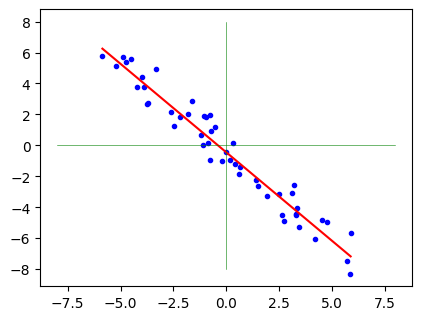

In [14]:
y_pred = linear_regression(x_lin_df, beta_0, beta_1)
plt.plot(x_lin_df, y_lin_df, 'b.')
plt.plot(x_lin_df, y_pred, 'r-')
plt.plot([0, 0], [-8, 8], 'g-', [-8, 8], [0, 0], 'g-', linewidth=0.4)

print("Mean Squared Error (MSE): {}".format(linear_regression_mse(y_lin_df, y_pred)))

And that's it. We've implemented a closed form to solve a simple linear regression. This form can be extended for the **Multiple Linear Regression** problem that you are going to study below. It's also known as **Ordinary Least Squares**, since it minimizes the squared error, and it's actually what is implemented (with a bit more detail) inside scikit-learn.

## 2 - Multiple Linear Regression

A simple linear regression is a good example to get you started, but most phenomena in our world are dependent on several factors. For example, house prices depend on things like (1) the number of rooms, (2) the distance to malls, (3) the distance to parks, (4) how old the house is, etc. It would be naive to create a univariate linear model to predict house prices, so let's expand our simple linear regression into *multiple* linear regression:

$$\hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + \beta_4 \cdot x_4 + \beta_5 \cdot x_5$$ 

which can also be written in a collapsed form:

$$\hat{y} = \beta_0 + \sum_{i=1}^{5} \beta_i \cdot x_i$$

The model generalizes to the following:

$$\hat{y} = \beta_0 + \sum_{i=1}^{N} \beta_i \cdot x_i$$

with an arbitrary number of parameters, one for each of the input features. We can also write the equations in matrix form:

$$\hat{y} = \beta_0 + X' \vec{\beta'} $$

Where $X'$ is a matrix with shape (num_samples, num_features) and $\vec{\beta'}$ the vector of coefficients with shape (num_features, 1). 

### 2.1 - Implementing and visualizing a multiple linear model

This is still a simple model, and we can, once again, implement it with a lambda function:

In [15]:
multiple_linear_regression = lambda x, betas: betas[0] + np.matmul(x, betas[1:])

Multiple linear regressions are a not as easy to visualize as a simple linear regression, due to the fact that they have multiple features that affect output, which, as a consequence, results in a **hyperplane** instead of a line (we'd have to plot it in 3D or in an even more complicated manner). However, polynomial regression is a way to model and visualize our output quite easily.

Polynomial functions are defined as follows:

$$\hat{y} = \beta_0 + \beta_1 x +  \beta_2 x^2 + ... +  \beta_n x^n $$

where $n$ is the order of our polynomial function. The equation depends on just one feature, x, which can easily be plotted in 2D.

You might be wondering how we can model these functions, which are clearly not linear, with a linear model. The main thing you need to understand is that, even though the inputs are not linear, the model is linear with respect to the coefficients, and we can easily assume each power of $x$ as a different feature:

$$ x = x_1 $$
$$ x^2 = x_2 $$
$$...$$
$$ x^n = x_n $$

Therefore, we have the same model similar to the one earlier in this notebook.

$$\hat{y} = \beta_0 + \sum_{i=1}^{N} \beta_i \cdot x_i$$

Run the next cell to see how a polynomial model can be represented as a multiple linear model:

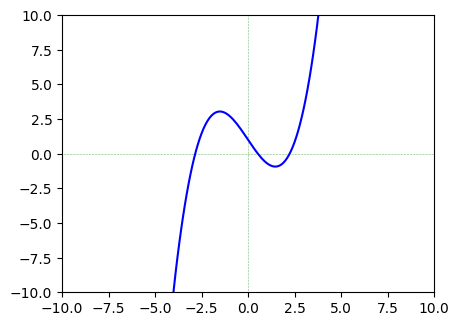

In [16]:
def plot_polynomial_regression_multiple(x, y, xlim, ylim):
    origin = (0, 0)

    plt.xlim(xlim)
    plt.ylim(ylim)

    # Plot axis for better visualization
    plt.plot(origin, ylim, 'g:', xlim, origin, 'g:', linewidth=0.4)

    # Plot linear model
    plt.plot(x, y, 'b')
    plt.show()

# Base independent variables
x_pln = np.arange(-10, 10, 0.1).reshape(-1, 1)
x_pln_2 = x_pln ** 2
x_pln_3 = x_pln ** 3

# Organize input in a matrix
X_pln = np.concatenate((x_pln, x_pln_2, x_pln_3), axis=1)

# Parameters
betas_pln = [1, -2, .025, .3]

# Dependent variable
y_pln = multiple_linear_regression(X_pln, np.array(betas_pln))
plot_regression_simple(x_pln.flatten(), y_pln, [-10, 10], [-10, 10])

Now, let's follow the same procedure we followed previously for the simple model and imagine that we have some data with noise that we want to use. Let's load it and visualize its shape:

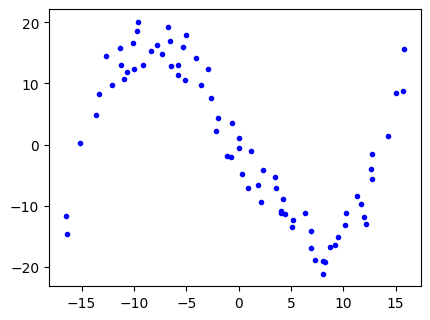

In [17]:
df = pd.read_csv('data/polynomial-learning-notebook.csv')
df = df.sort_values('x')

x_pln_df = df['x'].values
y_pln_df = df['y'].values
X_pln_df = df.drop(columns='y').values

plt.plot(x_pln_df, y_pln_df, 'b.');

Try to adjust the weights manually, just like you did earlier in this notebook:

In [18]:
def plot_polynomial_regression(b0=0, b1=1, b2=0, b3=0, xlim=(-20, 20), ylim=(-20, 20)):
    betas = np.array([b0, b1, b2, b3])
    y_pred = multiple_linear_regression(X_pln_df, betas)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(x_pln_df, y_pln_df, 'b.')
    plt.plot(x_pln_df, y_pred, 'r-')
    plt.plot([0, 0], ylim, 'g-', xlim, [0, 0], 'g-', linewidth=0.4)

def polynomial_regression_manual_demo_1(): 
    interact(plot_polynomial_regression, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=0), 
         b1=FloatSlider(min=-5, max=5, step=0.01, value=1), 
         b2=FloatSlider(min=-1, max=1, step=0.01, value=0), 
         b3=FloatSlider(min=-1, max=1, step=0.01, value=0), 
         xlim=fixed((-20, 20)), 
         ylim=fixed((-20, 20)));

polynomial_regression_manual_demo_1()

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

As you can see, it's much harder now to find these features manually. Let's see if having an error measure this time helps.

### 2.2 - Error measure for Multiple Linear Regression

Using the same logic as before, we still want a way to measure how well our model fits. Notice that, even though our model has several features and a corresponding increase in parameters, it still produces a single output. 

This means that we can define the error as the difference between the true and estimated output:

$$ e_i = y - \hat{y_i} $$

So, we will use the same cost function as before:

$$MSE(y, \hat{y}) = \frac{1}{N} \sum_{n=1}^N (y_i - \hat{y}_i)^2 $$

The only difference now is how we produced the estimate $\hat{y}$. Try it out in the interactive demo below:

In [19]:
def plot_polynomial_regression(b0=0, b1=1, b2=0, b3=0, xlim=(-20, 20), ylim=(-20, 20)):
    betas = np.array([b0, b1, b2, b3])
    y_pred = multiple_linear_regression(X_pln_df, betas)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(x_pln_df, y_pln_df, 'b.')
    plt.plot(x_pln_df, y_pred, 'r-')
    plt.plot([0, 0], ylim, 'g-', xlim, [0, 0], 'g-', linewidth=0.4)
    return "Mean Squared Error (MSE): {}".format(linear_regression_mse(y_pln_df, y_pred))

def polynomial_regression_manual_demo_1(): 
    interact(plot_polynomial_regression, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=0), 
         b1=FloatSlider(min=-5, max=5, step=0.01, value=1), 
         b2=FloatSlider(min=-1, max=1, step=0.01, value=0), 
         b3=FloatSlider(min=-0.5, max=0.5, step=0.005, value=0), 
         xlim=fixed((-20, 20)), 
         ylim=fixed((-20, 20)));

polynomial_regression_manual_demo_1()

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

It is still very hard to have to handle so many levers. So, for the multiple linear regression, automatic methods are even more important. Let's try an extension of the closed form solution.

### 2.3 - Closed form solution of Multiple Linear Regression models

#### 2.3.1 - Derivative of error function

Derivatives of the cost function with respect to the parameters are very similar to the ones in the simple linear regression scenario. In section 2 of [this notebook](Appendix%20-%20optional%20notebook%20with%20formula%20derivations.ipynb), you can see how to deduct them, so feel free to consult it if you are interested in that. 

The derivative of the cost function with respect to the intercept remains the same:

$$\frac{d J}{d \beta_0} = \frac{1}{N} \sum_{i=1}^N [2 (\hat{y_i} - y_i)] $$

Then, for the derivative with respect to the coefficients, the expression is still very similar to previous one. The only detail you need to pay attention to is that the feature multiplied in the derivative is the feature belonging to the parameter:

$$ \frac{d J}{d \beta_k} = \frac{1}{N}\sum_{i=1}^N [2(\hat{y_i} - y_i)x_{k_i}] $$ 

for $ k \in [1, K] $ , where K is the number of features of our model.

Once again, we can implement them as lambda functions.

In [20]:
mse_derivative_b0 = lambda y, y_hat: -(2*(y - y_hat)).mean()
mse_derivative_bk = lambda y, y_hat, x_k: -(2*(y - y_hat)*x_k).mean()

#### 2.3.2 - Closed Form Solution

For this closed form solution, matrix notation is useful. Let's try our initial model, as we define it below:

$$\hat{y} = \beta_0 + X' \vec{\beta'} $$

where each factor in this equation has the following shapes: 

shape( $\hat{y}$ ) = (num\_samples, 1)

shape( $X'$ ) = (num\_samples, num\_features)

shape( $\vec{\beta'}$ ) = (num\_features, 1).

We could even go a step further and re-write the above equation like this to 'hide' the intercept:

$$\hat{y} = X \vec{\beta}$$

As a result, we created a matrix $X$ of features simply by adding a column of 1's to our previous matrix:

$$ X = [\vec{1} | X']$$

and $\vec{\beta}$ is a concatenation of $\beta_0$ and $\vec{\beta'}$. In this equation, the shapes of its factors are:

shape( $X$ ) = (num\_samples, num\_features + 1)

shape( $\vec{\beta}$ ) = (num\_features + 1, 1).

Once again, the closed form solution comes from looking for the point where the derivatives are zero, but we're only going to show you the final result of that process. Look at in section 2 of [this notebook](Appendix%20-%20optional%20notebook%20with%20formula%20derivations.ipynb) if you want to see how to get there, step by step. We'll find our solution for a multiple linear regression with the following equation, which is called the _Normal Equation_:

$$ \vec{\beta} = (X^TX)^{-1}(X^T\vec{y})$$


Where, as mentioned above, $X$ is our matrix of samples extended by 1 for each sample: $X = [\vec{1} | X'] $ to account for the intercept, $\vec{y}$ is the output vector, and $\vec{\beta}$ the parameter vector with the parameters $\beta_0$ - $\beta_N$.

Try it out for the previous example. Let's load the data again:

In [21]:
df = pd.read_csv('data/polynomial-learning-notebook.csv')
df = df.sort_values('x')

x_pln_df = df['x'].values
y_pln_df = df['y'].values
X_pln_df = df.drop(columns='y').values

First, let's extend our inputs to have a column of ones: 

$$ X = [\vec{1} | X'] $$

In [22]:
X_extended = np.concatenate((np.ones((X_pln_df.shape[0], 1)), X_pln_df), axis=1)

Now, let's apply the closed form solution:

In [23]:
inv_xx = np.linalg.inv(np.matmul(X_extended.T, X_extended))
xy = np.matmul(X_extended.T, y_pln_df)
betas = np.matmul(inv_xx, xy)

print('Coefficients: {}'.format(betas))

Coefficients: [-0.58366246 -2.95329261  0.01443483  0.01440652]


Finally, let's plot the solution we achieved and the error associated with it:

Mean Squared Error (MSE): 7.2933131373365825


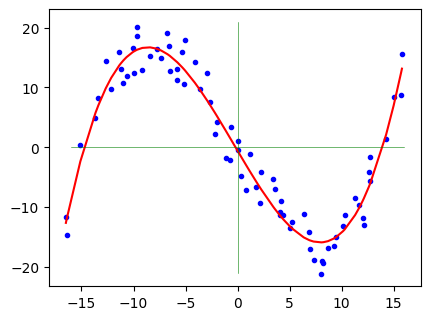

In [24]:
y_pred = multiple_linear_regression(X_pln_df, betas)
plt.plot(x_pln_df, y_pln_df, 'b.')
plt.plot(x_pln_df, y_pred, 'r-')
plt.plot([0, 0], [-21, 21], 'g-', [-16, 16], [0, 0], 'g-', linewidth=0.4)

print("Mean Squared Error (MSE): {}".format(linear_regression_mse(y_pln_df, y_pred)))

Let's do an extra example with a diabetes dataset. It contains patients' blood serum and other body measurements and a quantitative measure of their disease progression. Load the diabetes dataset below, read its description, and look into the data.

In [25]:
data = load_diabetes()
print(data['DESCR'])

X_db = pd.DataFrame(data['data'], columns=data['feature_names'])
y_db = pd.Series(data['target'], name='medv')

pd.concat((X_db, y_db), axis=1).head(5)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,medv
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's apply our closed form solution and see what output and errors we get:

In [26]:
X_extended = np.concatenate((np.ones((X_db.shape[0], 1)), X_db.to_numpy()), axis=1)

inv_xx = np.linalg.inv(np.matmul(X_extended.T, X_extended))
xy = np.matmul(X_extended.T, y_db.to_numpy())
betas = np.matmul(inv_xx, xy)

y_pred = multiple_linear_regression(X_db.to_numpy(), betas)

print('Feature coefficients: ')
print(pd.Series(betas[1:], X_db.columns))
print('\n')

print('Intercept: {}'.format(betas[0]))
print('\n')

print('\nTargets for the first 5 rows: \n\n', y_db.head(5).to_numpy())
print('\nPredictions for the first 5 rows: \n\n', y_pred[:5])
print("\nMean Squared Error (MSE): {}".format(linear_regression_mse(y_db.to_numpy(), y_pred)))

Feature coefficients: 
age    -10.009866
sex   -239.815644
bmi    519.845920
bp     324.384646
s1    -792.175639
s2     476.739021
s3     101.043268
s4     177.063238
s5     751.273700
s6      67.626692
dtype: float64


Intercept: 152.13348416289597



Targets for the first 5 rows: 

 [151.  75. 141. 206. 135.]

Predictions for the first 5 rows: 

 [206.11667725  68.07103297 176.88279035 166.91445843 128.46225834]

Mean Squared Error (MSE): 2859.6963475867506


Pretty simple, huh? The extended model is just an extension of the simpler model from earlier in this notebook. The more features you have, the more you have to include in the sum! And it still gives us a simple closed form solution!

But there is a **very important assumption** that this model does: it reveals that there is no collinearity in data data. 
 "**What the hell does that even mean**", you might ask. The term comes from linear algebra and means the following: 

_If you have a feature $x_i$ for which the values can be obtained through a **linear combination** of other features, then we have collinearity._

Collinearity can happen for one or more features, in which case it can be referred to as multicollinearity.

Let me give you some of the reasons why this is a problem: 
1. When people use linear regressions, after the parameter estimation phase, they use the coefficients as a way to measure **how important a feature is**. When you use collinear features, the magnitude of the parameters gets lowered for all features that are in that collinear relationship. That might be misleading, because collinear features are, essentially, one feature.
2. Collinear features add no value to the model, as if you're cloning the same feature and concatenating it to the dataset.

Datasets with collinear columns can be quite common. For example, if your dataset contains two columns related to weight, but one uses _kilograms_ as a unit of measure, while the other column uses _pounds_, then those two columns are colinear.

## 3 - Linear Regression with Scikit-learn
After learning the basics of linear regression and how to implement closed form solutions, it is time to go one step further and learn how to use linear regression with the scikit-learn Python library.

<img src="media/goku-sklearn.gif" width="400" title="sklearn-implementation">

[Scikit-Learn][sklearn] is an industry standard for data science and machine learning, and we'll be using it extensively throughout the academy. Scikit-learn has several implementations for linear regression:
* [*sklearn.linear_model.LinearRegression*][LinearRegression] uses normal equations to estimate the best intercept and coefficients. Normal equations are the closed form solution for linear regression, which means you'll know exactly the number of steps your solution will take and exactly what that solution guarantees. If you want to know more about this, [read this blog post][normal_eq].
* [*sklearn.linear_model.SGDRegressor*][SGDRegressor], or SGD Regressor, is a model that's optimized (trained) using SGD (Stochastic Gradient Descent) for regression tasks. It's basically a linear model that uses a decaying learning rate. (go to [Section 4](#4----Gradient-Descent) to learn more about it)

[SGDRegressor]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
[LinearRegression]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
[sklearn]: http://scikit-learn.org
[normal_eq]: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

For simplicity and because you're new to this world, let's try implementing the first one: *LinearRegression*.

Let's start by applying this to the polynomial example from our previous examples:

In [27]:
df = pd.read_csv('data/polynomial-learning-notebook.csv')
df = df.sort_values('x')

x_pln_df = df['x'].to_numpy()
y_pln_df = df['y'].to_numpy()
X_pln_df  = df.drop(columns='y').to_numpy()

Now, let's use LinearRegression from scikit-learn:

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_pln_df, y_pln_df)
coefficients = lr.coef_
intercept = lr.intercept_
betas = np.concatenate((np.array([intercept]), coefficients))

and plot the solution as we did before:

Mean Squared Error (MSE): 7.293313137336586


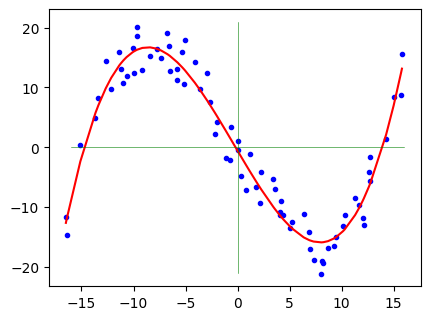

In [29]:
y_pred = multiple_linear_regression(X_pln_df, betas)
plt.plot(x_pln_df, y_pln_df, 'b.')
plt.plot(x_pln_df, y_pred, 'r-')
plt.plot([0, 0], [-21, 21], 'g-', [-16, 16], [0, 0], 'g-', linewidth=0.4)

print("Mean Squared Error (MSE): {}".format(linear_regression_mse(y_pln_df, y_pred)))

Now let's do the same for the diabetes example:

In [30]:
data = load_diabetes()

X_db = pd.DataFrame(data['data'], columns=data['feature_names'])
y_db = pd.Series(data['target'], name='medv')

pd.concat((X_db, y_db), axis=1).head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,medv
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's experiment with the first linear regression implementation:

In [31]:
lr = LinearRegression()
lr.fit(X_db, y_db)
coefficients = lr.coef_
intercept = lr.intercept_

print('Feature coefficients: ')
print(pd.Series(coefficients, X_db.columns))
print('\n')

print('Intercept: {}'.format(intercept))
print('\n')

print('\nTargets for the first 5 rows: \n\n', y_db.head(5).values)
print('\nPredictions for the first 5 rows: \n\n', lr.predict(X_db.head(5)))
print("\nMean Squared Error (MSE): {}".format(linear_regression_mse(y_db.values, lr.predict(X_db))))

Feature coefficients: 
age    -10.009866
sex   -239.815644
bmi    519.845920
bp     324.384646
s1    -792.175639
s2     476.739021
s3     101.043268
s4     177.063238
s5     751.273700
s6      67.626692
dtype: float64


Intercept: 152.13348416289597



Targets for the first 5 rows: 

 [151.  75. 141. 206. 135.]

Predictions for the first 5 rows: 

 [206.11667725  68.07103297 176.88279035 166.91445843 128.46225834]

Mean Squared Error (MSE): 2859.6963475867506


At this point, you've learned a lot about linear regression, and you might be wondering, <em>"Where is the error component in the linear regression formula?"</em>. Let's not answer that theoretical question right now. First, we need to approach our current subject from a practical standpoint.

Also, we haven't addressed the assumptions made by the linear regression model. For a hands-on approach to those, check this [blog post by Selva Prabhakaran](http://r-statistics.co/Assumptions-of-Linear-Regression.html).

![too-much-info](media/too-much-information.gif)

Let's take a step back, then, and review what we've already covered:

* How to implement a model for simple linear regression
* How to implement a model for multiple linear regression
* A simple error function we can use
* A closed form solution for linear regression
* The scikit-learn model for linear regression

You're probably just trying to take it all in as fast as you can. 

Don't despair. We're almost at the end of the notebook. The last topic we'll introduce is the gradient descent method. It'll only be a brief introduction, because you'll learn more about it in other units.

## 4 -  Gradient Descent 

In order to solve the linear regression problem and get the values of $\vec{\beta}$, we have, up to this point, studied closed form solutions, which resulted in a so-called _Normal Equation_. This equation allows us to obtain the optimum values of $\vec{\beta}$ through direct calculation.

However, the _Normal Equation_ isn't the only way to accomplish this. Instead, we can use iterative processes, which rely on optimization algorithms. There are, of course, advantages and disadvantages to this approach in comparison with the _Normal Equation_, on which we'll expand later in this section, but we can already note an advantage of the former. Interative processes can be used for several Machine Learning models, as well as applications in other fields, for which we wouldn't use the _Normal Equation_. 

In what follows, we will explore one of these iterative processes, the gradient descent method:

Gradient descent is a well known and popular iterative optimization for both linear and non-linear models. You can use it to estimate the parameters for linear regression, neural networks, probabilistic graphical models, k-means, and much more!

The essential component of the gradient descent algorithm is the **update rule**:

Let $f$ be a differentiable function and $\omega$ be one of the parameters of $f$. Then, in order to minimize the value outputted by $f(\omega)$, we iteratively use the following formula. In every step, we calculate the next value of $\omega$ from the previous value, and we repeat this process until we get close to the minumum value of $f$.

$$\omega_k = \omega_{k-1} - \alpha \frac{\partial f(\omega)}{\partial \omega}$$

$\frac{\partial f}{\partial \omega}$ is the [partial derivative of $f$ with respect to $\omega$](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives), and $\alpha$ is the learning rate. 
Therefore, we can see that gradient descent uses a partial derivative as a _heuristic_ to identify the direction where the minimum is located, and multiplying the learning rate by the partial derivative gives you a _velocity_ factor, which you'll use to update $\omega$. There are two ways to increase this _velocity_ : 
(1) higher learning rates and (2) big gradients (gradient is given by the derivative).

Those derivatives we mentioned earlier in this lesson will come in handy now.

$$\frac{d J}{d \beta_0} = -\frac{1}{N} \sum_{i=1}^N [2 (y_i - \hat{y_i})] $$

$$ \frac{d J}{d \beta_k} = -\frac{1}{N}\sum_{i=1}^N [2( y_i - \hat{y_i})x_{k_i}] $$ 

Let's implement them as lambda functions:

In [32]:
mse_derivative_b0 = lambda y, y_hat: -(2*(y - y_hat)).mean()
mse_derivative_bk = lambda y, y_hat, x_k: -(2*(y - y_hat)*x_k).mean()

Now, we can then use them to implement the update rule. Currently, we have:

1. _For epoch in 1...epochs:_
    1. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0} = \beta_0 - \alpha (-\frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n))$ 
    2. _For i in 1..K:_
        1. $\beta_i = \beta_i - \alpha \frac{\partial J}{\partial \beta_i} = \beta_i - \alpha (-\frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n) x_n)$

In [33]:
def gradient_descent_multiple_linear_regression(x, y, betas, learning_rate, epochs, clip=False):
    
    betas_ = betas.copy().reshape(-1, 1)
    for epoch in range(epochs): 
        y_hat = multiple_linear_regression(x, betas_.flatten())
        dJ_dbetas = np.zeros((x.shape[1] + 1, 1))
        dJ_dbetas[0] = mse_derivative_b0(y, y_hat)
        
        for col in range(x.shape[1]): 
            dJ_dbetas[col+1] = mse_derivative_bk(y, y_hat, x[:, col])
        
        # We add this to avoid increasingly bigger derivatives
        if clip == True:
            dJ_dbetas = np.clip(dJ_dbetas, -1, 1)
            
        betas_ = betas_ - learning_rate * dJ_dbetas

    return betas_

### 4.1 - Gradient Descent for simple linear regression

Let's try to run the gradient descent for our linear example:

In [34]:
np.random.seed(42)

df = pd.read_csv('data/linear-learning-notebook.csv')
df = df.sort_values('x')
x_lin_df = df['x'].to_numpy()
y_lin_df = df['y'].to_numpy()

betas = gradient_descent_multiple_linear_regression(
    x_lin_df.reshape(-1, 1), 
    y_lin_df, 
    np.random.rand(2), 
    0.01, 
    100)

Now plot the solution:

Mean Squared Error (MSE): 0.7354602285661168


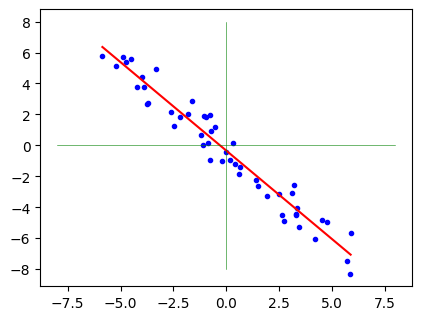

In [35]:
y_pred = linear_regression(x_lin_df, betas[0], betas[1])
plt.plot(x_lin_df, y_lin_df, 'b.')
plt.plot(x_lin_df, y_pred, 'r-')
plt.plot([0, 0], [-8, 8], 'g-', [-8, 8], [0, 0], 'g-', linewidth=0.4)

print("Mean Squared Error (MSE): {}".format(linear_regression_mse(y_lin_df, y_pred)))

### 4.2 - Gradient Descent for multiple linear regression

In [36]:
np.random.seed(42)

df = pd.read_csv('data/polynomial-learning-notebook.csv')
df = df.sort_values('x')
x_pln_df = df['x'].to_numpy()
X_pln_df = df.drop(columns='y').to_numpy()
y_pln_df = df['y'].to_numpy()

betas = gradient_descent_multiple_linear_regression(
    X_pln_df, 
    y_pln_df, 
    np.random.rand(4), 
    0.001, 
    5000, 
    clip=True)

Plot the solution again:

Mean Squared Error (MSE): 14.943328536097281


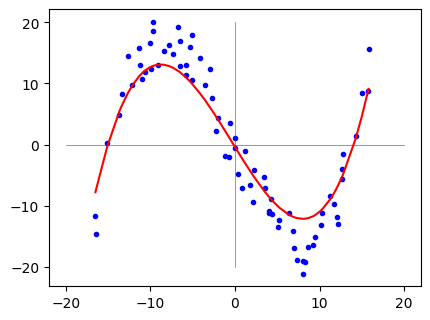

In [37]:
y_pred = multiple_linear_regression(X_pln_df, betas.flatten())
plt.plot(x_pln_df, y_pln_df, 'b.')
plt.plot(x_pln_df, y_pred, 'r-')
plt.plot([0, 0], [-20, 20], 'g-', [-20, 20], [0, 0], 'g-', linewidth=0.4)

print("Mean Squared Error (MSE): {}".format(linear_regression_mse(y_pln_df, y_pred)))

### 4.3 - Gradient Descent for multiple linear regression: diabetes example

Finally, let's run a Gradient Descent for the previous complex example:

In [38]:
data = load_diabetes()

X_db = pd.DataFrame(data['data'], columns=data['feature_names'])
y_db = pd.Series(data['target'], name='medv')

betas = gradient_descent_multiple_linear_regression(
    X_db.to_numpy(), 
    y_db.to_numpy(), 
    np.random.rand(X_db.shape[1]+1), 
    0.1, 
    5000)


Print the coefficients and the intercept and compare them and the error with the previous methods:

In [39]:
betas = betas.flatten()
y_pred = multiple_linear_regression(X_db.to_numpy(), betas)

print('Feature coefficients: ')
print(pd.Series(betas[1:], X_db.columns))
print('\n')

print('Intercept: {}'.format(betas[0]))
print('\n')

print('\nTargets for the first 5 rows: \n\n', y_db.head(5).to_numpy())
print('\nPredictions for the first 5 rows: \n\n', y_pred[:5])
print("\nMean Squared Error (MSE): {}".format(linear_regression_mse(y_db.to_numpy(), y_pred)))

Feature coefficients: 
age      6.478293
sex   -197.603432
bmi    487.730386
bp     302.660958
s1     -41.672292
s2    -106.718426
s3    -206.725395
s4     128.485856
s5     407.328457
s6     117.105207
dtype: float64


Intercept: 152.13348416289597



Targets for the first 5 rows: 

 [151.  75. 141. 206. 135.]

Predictions for the first 5 rows: 

 [199.31694936  71.17795405 172.66955412 160.45639725 127.52771582]

Mean Squared Error (MSE): 2899.0901338141266


### 4.4 - Gradient Descent vs Normal Equation

As we have just seen, both the _Normal Equation_ and the iterative optimization methods, such as _gradient descent_, are suitable methods to solve the linear regression problem. So, at this point, you might be wondering: (1) how to choose one method over the other, and (2) what are their advantages and disadvantages:

(1) To choose either the _Normal Equation_ or an iterative optimization, keep in mind that the _Normal Equation_ is specific for linear models and, therefore, should not be used to solve other type of models.

However, we can also ask how to choose between methods when dealing with Linear models only. There are two options: (1) if you are going to use a scikit-learn `LinearRegression` model, then the choice is made for you. Scikit-learn will apply the _Normal Equation_ (together with other mathematical techniques that allow for computational requirements to be reduced). If you decide to go with your own hands-on implementation, then consider the positives and negatives of each method.

(2) Regarding the advantages and disadvantages of each method in general, keep the following points in mind:

The advantages of the _Normal Equation_ method over _Gradient Descent_:
- The _Normal Equation_ method doesn't require any iterations to reach a result
- It doesn't require the user to choose the value of a learning rate
- And it doesn't require variables to be scaled or normalized

The advantages of the _gradient descent_ method over _Normal Equation_:
- The _gradient descent_ method works well when you have a large number of features, which will slow down the _Normal Equation_ method. 
- The _gradient descent_ method doesn't require computing the $(X^T X)^{-1}$ component, which can be problematic, because $X^T X$ may be a non-invertible quantity, which happens, for example, when two features are linearly dependent.

### 4.5 - Normalization

You might have notice in the description of the diabetes dataset that it's normalized. Specifically, the description says:
>Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Run the cell below to see the dataset:

In [40]:
X_db.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


This kind of normalization is called standardization and is achieved by using the scikit-learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Another common normalization technique is normalization to a certain range, e.g. between 0 and 1. This is done using the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). 

Generally, you should always check if your dataset is normalized or if the model you are planning to use requires normalization. If it does, you should ask what kind of normalization it needs. You'll learn more about normalization in later units, but for now let's just discuss its importance to linear regression.

To execute correctly, the `SGDRegressor` requires a standardization of features, and the `LinearRegression` model doesn't require normalization. Considering how limited computational precision during calculation, if features suffer a wide range of different values, you might not get your expected result.

Two reasons for normalizing features are:

1. Depending on what optimization algorithm you use, if feature $f_1$ has a range of [-4.1; 3] and feature $f_2$ has a range of [-1.1; 100000], your predictions won't give you accurate results. More technically speaking, the impact on the gradient calculation can lead to problems in the convergence to the global minimums. There are optimization algorithms that can avoid this issue, but still suffer from issue (2).
4. If two features use different ranges, it will be hard to compare them in terms of their importance. For example, if feature ($f_1$)'s range is [-0.1; 0.1] and feature ($f_2$)'s range is [0; 1000], it doesn't make sense to understand the influence of features on prediction through the same lens as we used above, when we had our introduction to simple linear regression (i.e. an increase of 1 unit in $x$ increases $\beta_1$ units in $\hat{y}$). Therefore, we're left with two options:
    1. Normalize the resulting coefficients according to the scale;
    2. Normalize the inputs into the same scale.

## 5 - Summary: Linear Regression Pros & Cons

**PROS**
* Really easy to understand
* Fast optimization
* Easy to extend the model: you haven't seen how this is true here, but there is a thing called the _Generalized Linear Model (GLM)_. Once you get a good grip on linear regression, you should visit the [scikit-learn page on GLMs](http://scikit-learn.org/stable/modules/linear_model.html) to learn more. 

**CONS**
* Obviously, it only works for linear problems (linear dependence of output on features).
* It's sensitive to outliers, even though there are ways, at least partially, to deal with this issue.
* Linear regresion assumes that there is no collinearity.
* So far, we've only addressed numerical features, but we shouldn't forget categorical features (see SLU12). Specifically, things might get tricky when the number of unique values is large, but some of those unique values occur infrequently.

## Next Step: Exercise Notebook
And that is it! Congratulations! You've just learned your first predictive model. You've learned how to perform linear regressions with simple and multiple features models, and you're now able to solve them through closed form solutions and even through a simple iterative method. Now, go on and apply what you've learned to the exercises. Also, check out the examples notebook for practical code snippets. 

In the next units, you'll see other types of tasks and models and learn advanced topics.

![im-ready](media/im-ready.gif)